# Decision Tree Implementation

### PreProcess Data

In [72]:
import PreProcessData as pre
import imp
import numpy as np
import pandas as pd
import operator
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
imp.reload(pre)
X_train, X_valid, y_train, y_valid = pre.PreProcessData()
y_valid = [0 if int(y) == 2 or int(y) == 3 else y for y in y_valid]
y_valid = np.array(y_valid)
y_valid = y_valid.reshape(-1,1)
# print(X_train)

### Class Construction

In [73]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_class = len(np.unique(y))

        # Check termination conditions
        if depth == self.max_depth or num_class == 1:
            return np.bincount(y).argmax()

        # Find the best split
        best_split = self._find_best_split(X, y)

        if best_split['impurity'] == 0:
            return np.bincount(y).argmax()

        left_indices = X[:, best_split['feature_index']] <= best_split['threshold']
        right_indices = ~left_indices

        # Recursively build the left and right subtrees
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature_index': best_split['feature_index'],
                'threshold': best_split['threshold'],
                'left': left_subtree,
                'right': right_subtree}

    def _calculate_gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def _find_best_split(self, X, y):
        num_samples, num_features = X.shape
        best_split = {}
        best_gini = float('inf')

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                left_gini = self._calculate_gini(y[left_indices])
                right_gini = self._calculate_gini(y[right_indices])

                gini = (len(y[left_indices]) / num_samples) * left_gini \
                       + (len(y[right_indices]) / num_samples) * right_gini

                if gini < best_gini:
                    best_split = {'feature_index': feature_index,
                                  'threshold': threshold,
                                  'impurity': gini}
                    best_gini = gini

        return best_split

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if isinstance(node, int):
            return node

        if isinstance(node, dict):
            if x[node['feature_index']] <= node['threshold']:
                return self._traverse_tree(x, node['left'])
            else:
                return self._traverse_tree(x, node['right'])
        else:
            # If the node is not a dictionary, return it as it is
            return node

    def validate(self, y_pred, y_valid):
        num_of_correct_predictions = 0
        for i in range(len(y_valid)):
            if y_pred[i] == y_valid[i]:
                num_of_correct_predictions += 1
        accuracy = num_of_correct_predictions / len(y_valid)
        return accuracy

    def plot(self, y_pred, y_valid):
        y_pred = [0 if y < 0.5 else 1 for y in y_pred]
        # Calculate confusion matrix
        cm = confusion_matrix(y_valid, y_pred)

        # Define labels for the confusion matrix
        labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

        # Annotate cells with labels
        for i in range(2):
            for j in range(2):
                plt.text(j + 0.5, i + 0.3, labels[i][j], ha='center', va='center', color='red')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix with Labels')
        plt.show()


### Max Depth of 1

In [74]:
tree1 = DecisionTree(max_depth=1)
tree1.fit(np.array(X_train), np.array(y_train))
predictions1 = tree1.predict(np.array(X_valid))
print(tree1.validate(predictions1, y_valid))

0.6272666218938885


Decision Tree is constructed, all predictions are 1 for this model

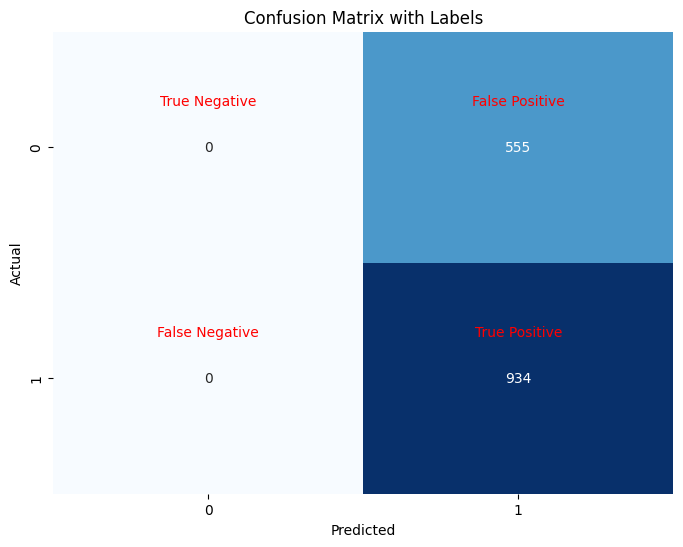

In [75]:
tree1.plot(predictions1, y_valid)

### Max Depth of 3

In [76]:
tree3 = DecisionTree(max_depth=3)
tree3.fit(np.array(X_train), np.array(y_train))
predictions3 = tree3.predict(np.array(X_valid))
print(tree3.validate(predictions3, y_valid))

0.6749496306245802


Model accuracy is increased by 5% from the previous model

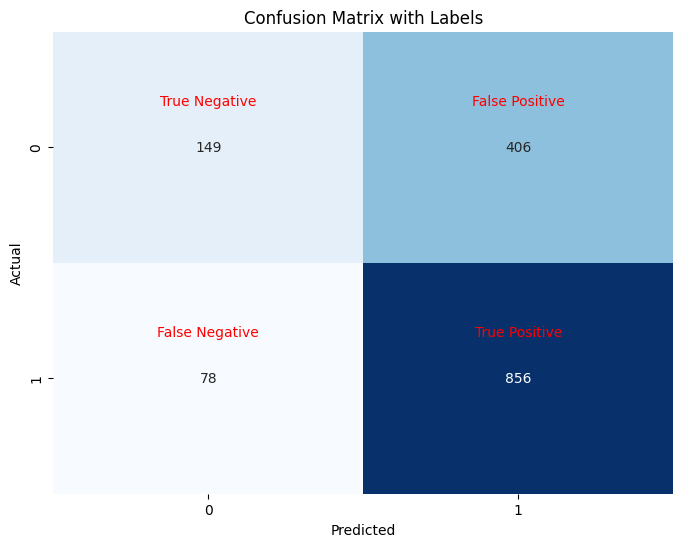

In [77]:
tree3.plot(predictions3, y_valid)

### Max Depth of 6

In [78]:
tree6 = DecisionTree(max_depth=6)
tree6.fit(np.array(X_train), np.array(y_train))
predictions6 = tree6.predict(np.array(X_valid))
print(tree6.validate(predictions6, y_valid))

0.7051712558764271


Model further increases it's predictive nature by 3%

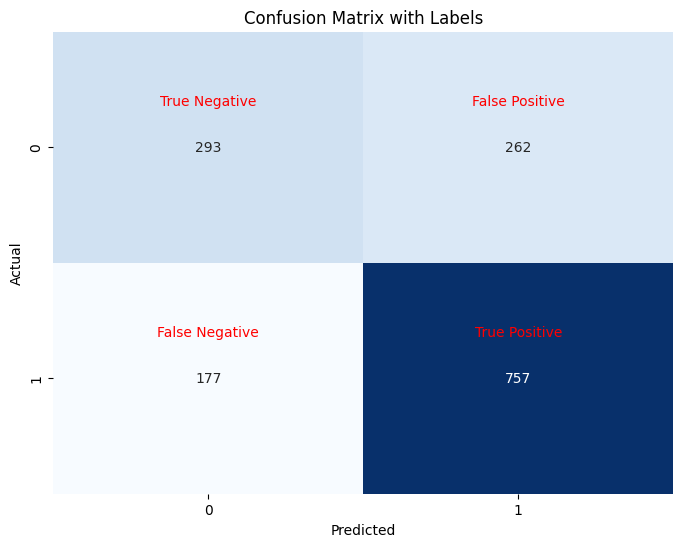

In [79]:
tree6.plot(predictions6, y_valid)

### Max Depth of 8

In [80]:
tree8 = DecisionTree(max_depth=8)
tree8.fit(np.array(X_train), np.array(y_train))
predictions8 = tree8.predict(np.array(X_valid))
print(tree8.validate(predictions8, y_valid))

0.6910678307588985


Model drops by 1%, we are now expiriencing lower emperical risk and higher true risk.

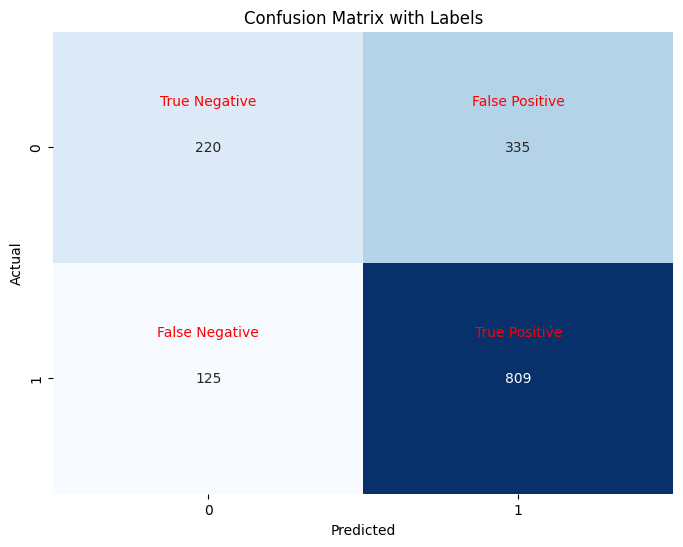

In [81]:
tree8.plot(predictions8, y_valid)

### Max Depth of 7

In [86]:
tree7 = DecisionTree(max_depth=7)
tree7.fit(np.array(X_train), np.array(y_train))
predictions7 = tree7.predict(np.array(X_valid))
print(tree7.validate(predictions7, y_valid))

0.707186030893217


This model is 0.2% better than the 6 depth model and 1.5% better than the 8 depth model. Looks like we found the best decision tree for our dataset.

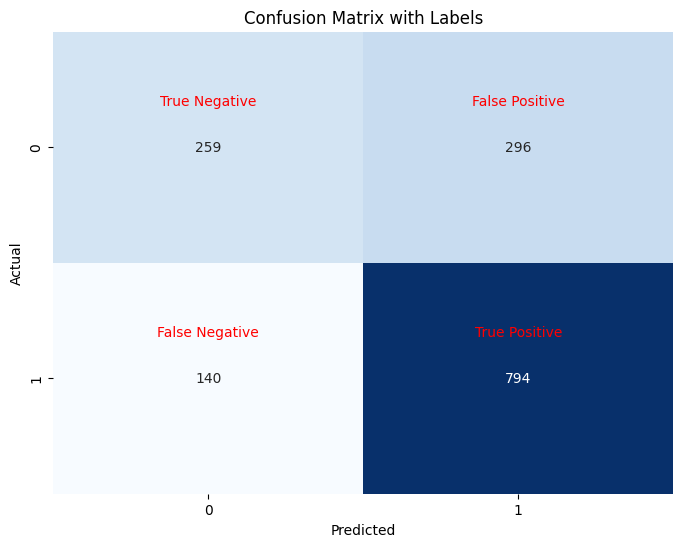

In [87]:
tree7.plot(predictions7, y_valid)